For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

$H_0$: Network latency is same before and after switching to ISP\
$H_a$: Network latency has gone up after switching to ISP

- True Positive:
    - low p value
    - reject $H_0$
    - Network latency before the switch 0.5 ms
    - Network latency after the switch 2 ms
 
 
- False Positive:
    - low p value
    - reject $H_0$
    - significantly higher latency time after switch
    - Testing before and after was done with different hardware and different time of day

- True Negative:
    - higher p value
    - accept $H_0$
    - Network latency before the switch 2 ms
    - Network latency after the switch 2.1 ms
     
- False Negative
    - higher p value
    - accept $H_0$
    - network latency has not changed much
    - two tests (before and after) have other variables which affect latency measurement

Is the website redesign any good?

$H_0$: The website redesign does not result in increased customer satisfaction\
$H_a$: The website redesign results in increased customer satisfaction

- True Positive:
    - low p value
    - reject  $H_0$
    - the customer satisfaction rating before website redesign 6/10
    - the customer satisfaction rating after website redsign 9/10

- False Positive: 
    - low p value
    - reject  $H_0$
    - The customer satisfaction rating increased after website redesign
    - The rating questionnaire changed before and after website redesign
    
- False Negative:
    - high p value
    - accept $H_0$
    - survey shows customer satisfaction rating has not changed
    - survey had differenr scales/questions before and after the redesign
- True Negative:
    - higher p value
    - accept $H_0$
    - survey shows customer satisfaction rating has not changed
    - the customer satisfaction rating before website redesign 7.5/10
    - the customer satisfaction rating after website redsign 7/10

Is our television ad driving more sales?

$H_0$: TV ad does not drive more sales\
$H_a$: TV ad does drive more sales

- True Positive:
    - low p value
    - reject  $H_0$
    - average monthly sales before TV ads is 1 million
    - average monthly sales after TV ads is 2.2 million

- False Positive: 
    - low p value
    - reject  $H_0$
    - sales increased after TV ads
    - New products were introduced along with TV ads
    
- False Negative:
    - high p value
    - accept $H_0$
    - sales did not change after TV ads
    - Economy is in recession resulting in lower demand
    
- True Negative:
    - higher p value
    - accept $H_0$
    - sales before TV ads is 1 million
    - sales after TV ads is 0.9 million

# t-test exercise


Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [13]:

from math import sqrt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from pydataset import data
import datetime 
from dateutil import relativedelta

$H_0$: average time to sell homes for its two offices is same\
$H_a$ average time to sell homes for its two offices is different

In [2]:
alpha = 0.05

xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = (n1 + n2) - 2 # n - number of categories

s_p = sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2)
    /
    (n1 + n2 - 2)
)

t = (xbar1 - xbar2) / (s_p * sqrt(1 / n1 + 1 / n2))


print(f't = {t:.3}')

t = -2.63


In [3]:
p = stats.t(degf).cdf(t) * 2
print(f'p = {p:.3}')

p = 0.0102


Since p value is less than 0.05, we reject the null hypothesis meaning there is difference in average time to sell for two offices

# Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [4]:
mpg = data('mpg')


In [5]:
mpg['average_mpg'] = mpg[['cty', 'hwy']].mean(axis= 1)
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


$H_0$: Cars from both model years have same mpg\
$H_a$: Cars from both model years have different mpg

In [6]:
fe_2008 = mpg[mpg.year == 2008].average_mpg
fe_1999 = mpg[mpg.year == 1999].average_mpg

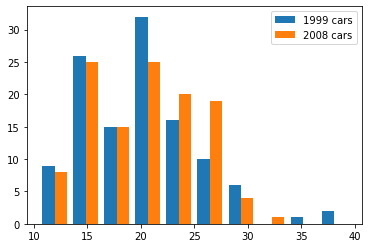

In [7]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

In [8]:
t_stat, p = stats.ttest_ind(fe_1999, fe_2008)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 0.22
p = 0.826


Since p value is >0.05, we fail to reject the null hypothesis meaning their fuel economy is no different

# Are compact cars more fuel-efficient than the average car? 

$H_0$: compact cars have same fuel efficiency as a average car\
$H_a$: compact cars are more fuel efficient than average car

In [9]:
mpg = mpg.rename(columns ={'class' : 'type'})

In [10]:
x = mpg[mpg.type == 'compact'].average_mpg
mu = mpg.average_mpg.mean()
t_stat, p = stats.ttest_1samp(x, mu)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 7.9
p = 4.2e-10


Since p value is <0.05, we reject the null hypothesis meaning their fuel economy is not same

# Do manual cars get better gas mileage than automatic cars?

$H_0$: manual car get same mileage as automatic cars

In [11]:
fe_auto = mpg[mpg.trans.str.contains('auto')].average_mpg
fe_manual = mpg[mpg.trans.str.contains('manual')].average_mpg

In [12]:
t_stat, p = stats.ttest_ind(fe_auto, fe_manual)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = -4.59
p = 7.15e-06


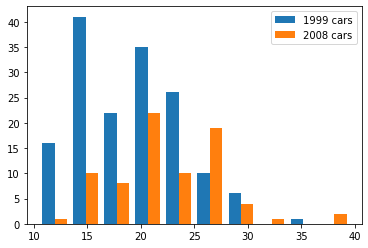

In [13]:
plt.hist([fe_auto, fe_manual], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

Since p value is <0.05, we reject the null hypothesis meaning  fuel economy for manual is better than automatic cars 

In [14]:
df = pd.read_csv('exam_scores.csv')
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


Compare exam scores for folks with high coffee consumption vs low coffee consumption

$H_0$ = Exam scores are same for high and low coffee drinkers.\
$H_0$ = Exam scores are different for high and low cofee drinkers

In [15]:
df['group'] = pd.cut(x=df.coffee_consumed, bins=[0,5,10], labels = ['low', 'high'], include_lowest = True)

In [102]:
df.head()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students


In [17]:
high_c_score = df[df.group == 'high'].exam_score

In [18]:
low_c_score = df[df.group == 'low'].exam_score

In [19]:
t_stat, p = stats.ttest_ind(low_c_score, high_c_score)
print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 9.06
p = 4.86e-11


Since p-value is < 0.05, the null hypothesis is rejected meaning there is statistically significant different in scores of high vs low coffee drinkers

# Correlation Exercise

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [14]:
from env import host, user, password

In [15]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [22]:
customers = pd.read_sql("SELECT* from customers", get_db_url('telco_churn'))

In [23]:
internet_service_types = pd.read_sql("SELECT* from internet_service_types", get_db_url('telco_churn'))

In [24]:
internet_service_types

,internet_service_type_id,internet_service_type
0,1,DSL
1,2,Fiber optic
2,3,None


In [25]:
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [26]:
customers['total_charges'] = customers['total_charges'].str.strip()

In [27]:
customers = customers.replace(r'^\s*$', np.nan, regex=True)

In [28]:
customers = customers.fillna(0)

In [29]:
customers['total_charges'] = customers['total_charges'].astype(float)

In [30]:
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


In [31]:
customers.sort_values(by='total_charges')

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
2250,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.35,0.00,No
2855,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,1,No,...,Yes,Yes,Yes,No,3,No,2,73.35,0.00,No
3052,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.75,0.00,No
945,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,Yes,No,3,No,4,56.05,0.00,No
1906,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,1,Yes,...,No,Yes,No,No,3,Yes,3,61.90,0.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,1,116.25,8564.75,No
6892,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,4,116.95,8594.40,No
6855,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,3,No,4,117.50,8670.10,No
5360,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,3,118.75,8672.45,No


Does tenure correlate with monthly charges?

$H_0$: There is no correlation between tenure and monthly charges

In [32]:
x = customers.tenure
y = customers.monthly_charges
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.248
p=, 4.094e-99


Reject the null hypothesis

r= 0.24789985628615002


Text(0, 0.5, 'Monthly Charges')

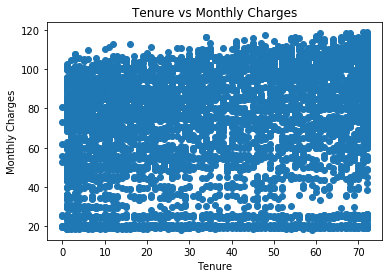

In [33]:
plt.scatter(x, y)
print('r=', r)
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')

Tenure vs Total charges?

$H_0$: There is no correlation between tenure and total charges

In [34]:
x = customers.tenure
y = customers.total_charges


In [35]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.826
p=, 0.0


r= 0.8261783979502421


Text(0, 0.5, 'Total Charges')

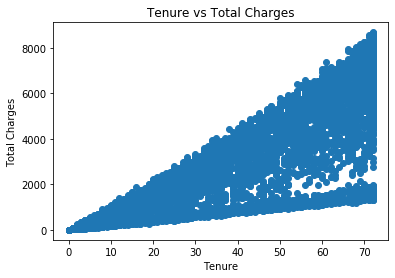

In [36]:
plt.scatter(x, y)
print('r=', r)
plt.title('Tenure vs Total Charges')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')

What happens if you control for phone and internet service?

does tenure correlate with charges is the overall question, but we can answer several subquestions to control for other variables, e.g.
how does tenure correlate with charges for folks with internet but no phone
how does tenure correlate with charges for folks with internet and phone service

In [37]:
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


In [38]:
x = customers[(customers.internet_service_type_id == 1) & (customers.phone_service == 'Yes')].tenure
y = customers[(customers.internet_service_type_id == 1) & (customers.phone_service == 'Yes')].total_charges

In [39]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.971
p=, 0.0


r= 0.9705931617494687


Text(0, 0.5, 'Total Charges')

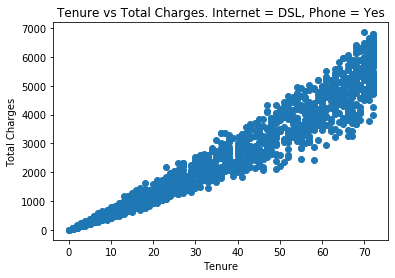

In [40]:
plt.scatter(x, y)
print('r=', r)
plt.title('Tenure vs Total Charges. Internet = DSL, Phone = Yes')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')

In [41]:
x = customers[(customers.internet_service_type_id == 2) & (customers.phone_service == 'Yes')].tenure
y = customers[(customers.internet_service_type_id == 2) & (customers.phone_service == 'Yes')].total_charges

In [42]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.985
p=, 0.0


r= 0.9853093528070602


Text(0, 0.5, 'Total Charges')

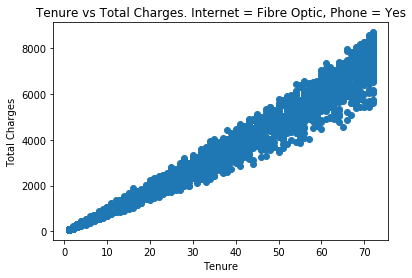

In [43]:
plt.scatter(x, y)
print('r=', r)
plt.title('Tenure vs Total Charges. Internet = Fibre Optic, Phone = Yes')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')

In [44]:
x = customers[(customers.internet_service_type_id == 3) & (customers.phone_service == 'Yes')].tenure
y = customers[(customers.internet_service_type_id == 3) & (customers.phone_service == 'Yes')].total_charges

In [45]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.982
p=, 0.0


r= 0.9815669784401058


Text(0, 0.5, 'Total Charges')

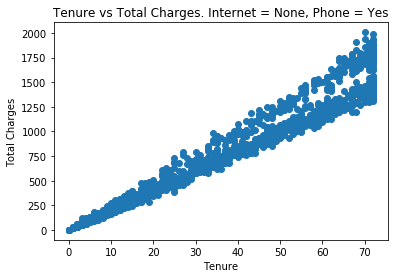

In [46]:
plt.scatter(x, y)
print('r=', r)
plt.title('Tenure vs Total Charges. Internet = None, Phone = Yes')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')

In [47]:
x = customers[(customers.internet_service_type_id == 1) & (customers.phone_service == 'No')].tenure
y = customers[(customers.internet_service_type_id == 1) & (customers.phone_service == 'No')].total_charges

In [48]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.954
p=, 0.0


r= 0.9535697728407464


Text(0, 0.5, 'Total Charges')

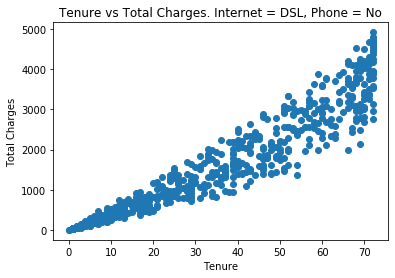

In [49]:
plt.scatter(x, y)
print('r=', r)
plt.title('Tenure vs Total Charges. Internet = DSL, Phone = No')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')

In [50]:
x = customers[(customers.internet_service_type_id == 3) & (customers.phone_service == 'No')].tenure
y = customers[(customers.internet_service_type_id == 3) & (customers.phone_service == 'No')].total_charges

In [51]:
x

Series([], Name: tenure, dtype: int64)

Use the employees database.\
Is there a relationship between how long an employee has been with the company and their salary?


In [52]:
salary = pd.read_sql("SELECT* from salaries", get_db_url('employees'))

In [332]:
salary.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [333]:
employees = pd.read_sql("SELECT* from employees", get_db_url('employees'))

In [334]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [335]:
curr_salary = salary[salary.to_date.astype('str') == '9999-01-01']

In [336]:
curr_salary.head()

,emp_no,salary,from_date,to_date
16,10001,88958,2002-06-22,9999-01-01
22,10002,72527,2001-08-02,9999-01-01
29,10003,43311,2001-12-01,9999-01-01
45,10004,74057,2001-11-27,9999-01-01
58,10005,94692,2001-09-09,9999-01-01


In [337]:
merged = pd.merge(curr_salary, employees, left_on='emp_no', right_on='emp_no', how='left')

In [342]:
merged.head()

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,hire_year
0,10001,88958,2002-06-22,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26,1986
1,10002,72527,2001-08-02,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21,1985
2,10003,43311,2001-12-01,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28,1986
3,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,1986
4,10005,94692,2001-09-09,9999-01-01,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,1989


In [341]:
merged['hire_year'] =  merged.apply(lambda row: str(row.hire_date.year), axis =1)

In [343]:
merged['tenure'] =  merged.apply(lambda row: (2000 - float(row.hire_year)), axis =1)

In [363]:
merged.head()

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,hire_year,tenure
0,10001,88958,2002-06-22,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26,1986,14.0
1,10002,72527,2001-08-02,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21,1985,15.0
2,10003,43311,2001-12-01,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28,1986,14.0
3,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,1986,14.0
4,10005,94692,2001-09-09,9999-01-01,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,1989,11.0


$H_0$: There is no relationship between Tenure and salary

In [379]:
x = merged.tenure
y = merged.salary

In [380]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.305
p=, 0.0


Since p<0.05, we reject the null hypothesis, but relationship is weak

r= 0.3051601122415335


Text(0, 0.5, 'Salary')

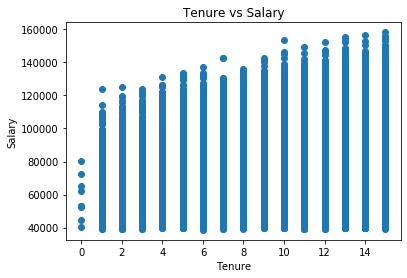

In [381]:
plt.scatter(x, y)
print('r=', r)
plt.title('Tenure vs Salary')
plt.xlabel('Tenure')
plt.ylabel('Salary')

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [367]:
titles = pd.read_sql("SELECT* from titles", get_db_url('employees'))

In [368]:
num_titles = titles.groupby('emp_no').emp_no.agg(['count'])
num_titles.head()

,count
emp_no,
10001,1
10002,1
10003,1
10004,2
10005,2


In [369]:
merged1 = pd.merge(num_titles, merged, left_on='emp_no', right_on='emp_no', how='left')

In [370]:
merged1 = merged1.rename(columns={'count': 'title_count'})

In [371]:
merged1 = merged1.replace([np.inf, -np.inf], np.nan).dropna()

$H_0$: There is no relationship between Tenure and number of titles

In [372]:
x = merged1.tenure
y = merged1.title_count

In [373]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.286
p=, 0.0


r= 0.28635198982844734


Text(0, 0.5, 'Number of titles')

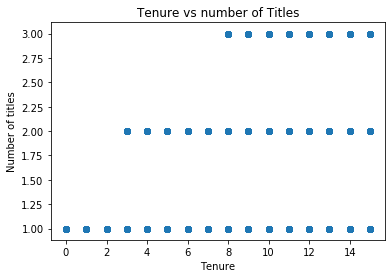

In [378]:
plt.scatter(x, y)
print('r=', r)
plt.title('Tenure vs number of Titles')
plt.xlabel('Tenure')
plt.ylabel('Number of titles')

# Use the sleepstudy data. Is there a relationship between days and reaction time?

In [55]:
# From Ryan Orsinger
from pydataset import data
df = data()
df[df.title.str.contains("sleep")]

,dataset_id,title
383,msleep,An updated and expanded version of the mammals sleep dataset.
705,cushny,A data set from Cushny and Peebles (1905) on the effect of three drugs on hours of sle...
756,sleepstudy,Reaction times in a sleep deprivation study


In [57]:
sleep = data('sleepstudy')

In [58]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


$H_0$: There is no relationship between days and reaction time

In [60]:
x = sleep.Days
y = sleep.Reaction

In [61]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.535
p=, 9.894e-15


Text(0, 0.5, 'Reaction vs Days')

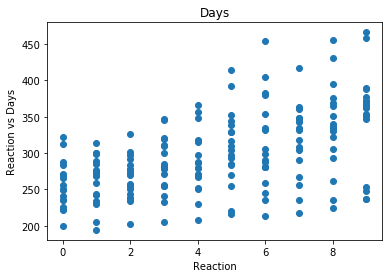

In [63]:
plt.scatter(x, y)
plt.title('Days')
plt.xlabel('Reaction')
plt.ylabel('Reaction vs Days')

Since p <0.05, we reject the null hypothesis

# Chi2 Test - Exercise

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

$H_0$ =  using a macbook and being a codeup student are independent of each other.

In [9]:
index = ['uses_mac', 'does_not_uses_mac']
columns = ['Codeup_student', 'Non_Codeup_student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

In [10]:
observed

,Codeup_student,Non_Codeup_student
uses_mac,49,20
does_not_uses_mac,1,30


In [11]:
nrows, ncols = observed.shape
degf = (nrows - 1) * (ncols - 1)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


Since p < 0.05, we reject the null hypothesis that using a macbook and being a codeup student are independent of each other.

2. Choose another 2 categorical variables from the mpg dataset and perform a 
chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [96]:
mpg = data('mpg')


In [97]:
mpg['trans'] = mpg['trans'].str[0:4]
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
2,audi,a4,1.8,1999,4,manu,f,21,29,p,compact
3,audi,a4,2.0,2008,4,manu,f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


$H_0$: There is no relationship between vehicle trans and vehicle class\
$H_a$: There is a relationship between vehicle trans and vehicle class


In [99]:
observed = pd.crosstab(mpg.trans, mpg['class'])

In [100]:
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
trans,,,,,,,
auto,2,24,29,11,20,16,55
manu,3,23,12,0,13,19,7


In [101]:
nrows, ncols = observed.shape
degf = (nrows - 1) * (ncols - 1)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 2 24 29 11 20 16 55]
 [ 3 23 12  0 13 19  7]]
---
Expected

[[ 3.35470085 31.53418803 27.50854701  7.38034188 22.14102564 23.48290598
  41.5982906 ]
 [ 1.64529915 15.46581197 13.49145299  3.61965812 10.85897436 11.51709402
  20.4017094 ]]
---

chi^2 = 33.7700
p     = 0.0000


# Since p <0.05, we reject the $H_0$

# 3. Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?

In [16]:
sql = """
select emp_no, dept_no, from_date, to_date, gender, dept_name
from dept_emp
join employees using(emp_no)
join departments using(dept_no)
where to_date > curdate()
"""
employees1 = pd.read_sql(sql, get_db_url('employees'))

In [17]:
employees1.head()

,emp_no,dept_no,from_date,to_date,gender,dept_name
0,10038,d009,1989-09-20,9999-01-01,M,Customer Service
1,10049,d009,1992-05-04,9999-01-01,F,Customer Service
2,10060,d009,1992-11-11,9999-01-01,M,Customer Service
3,10088,d009,1992-03-21,9999-01-01,F,Customer Service
4,10112,d009,1998-05-01,9999-01-01,F,Customer Service


# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_0$: employees gender is independent of whether he/she works in sales or marketing

In [18]:
employees1 = employees1[(employees1.dept_name == 'Sales') | (employees1.dept_name == 'Marketing')]

In [19]:
employees1.head()

,emp_no,dept_no,from_date,to_date,gender,dept_name
104290,10017,d001,1993-08-03,9999-01-01,F,Marketing
104291,10058,d001,1988-04-25,9999-01-01,M,Marketing
104292,10140,d001,1991-03-14,9999-01-01,F,Marketing
104293,10228,d001,1993-01-28,9999-01-01,F,Marketing
104294,10239,d001,1996-05-04,9999-01-01,F,Marketing


In [20]:
observed = pd.crosstab(employees1.gender, employees1.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [21]:
nrows, ncols = observed.shape
degf = (nrows - 1) * (ncols - 1)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692


since p is greater than 0.05, we fail to reject the null hypothesis.

# Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: employee's gender independent of whether or not they are or have been a manager?

In [27]:
sql = """
SELECT emp_no
FROM dept_manager
"""
managers = pd.read_sql(sql, get_db_url('employees'))

In [28]:
managers = managers.to_numpy()

In [29]:
sql = """
SELECT *
FROM employees
"""
employees2 = pd.read_sql(sql, get_db_url('employees'))

In [30]:
employees2['is_manager'] = employees2.emp_no.apply(lambda x: True if x in managers else False)

In [31]:
employees2.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,is_manager
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,False
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,False
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,False
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,False
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,False


In [32]:
observed = pd.crosstab(employees2.gender, employees2.is_manager)
observed

is_manager,False,True
gender,,
F,120038,13
M,179962,11


In [33]:
nrows, ncols = observed.shape
degf = (nrows - 1) * (ncols - 1)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[1.20041397e+05 9.60331174e+00]
 [1.79958603e+05 1.43966883e+01]]
---

chi^2 = 1.4567
p     = 0.2275


# Since p >0.05 we fail to reject the null hypothesis